<h1>Amazon Customer Review Sentiment Analysis<h1>

In [1]:
#Importing Relevant Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Importing some more libraries for natural language processing
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [4]:
#Loading the data
data = pd.read_csv("./data/amazon_reviews.csv")
data.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
#Removing unwanted columns
data.drop(['Unnamed: 0','reviewerName','reviewTime','day_diff','helpful_yes','helpful_no','total_vote','score_pos_neg_diff','score_average_rating','wilson_lower_bound'], inplace=True, axis=1)

In [6]:
#Renaming columns
data.rename(columns={'reviewText':'reviews','overall':'rating'},inplace=True)
data.head(5)

,rating,reviews
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [7]:
#Changing column datatype
data['reviews'] = data['reviews'].astype('str',copy=False)

<h2>Text Processing<h2>

In [8]:
#Converting all text to lowercase

data['reviews'] = data.reviews.apply(lambda x:x.lower())

data['reviews'] = data['reviews'].str.replace(r'[^\w\s]+', '') 

data.head(5)

,rating,reviews
0,4.0,no issues
1,5.0,purchased this for my device it worked as adve...
2,4.0,it works as expected i should have sprung for ...
3,5.0,this think has worked out greathad a diff bran...
4,5.0,bought it with retail packaging arrived legit ...


In [9]:
#Removing irrelevant words and abbreviations
data['reviews'] = data['reviews'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
data.head(5)

,rating,reviews
0,4.0,issues
1,5.0,purchased this device worked advertised never ...
2,4.0,works expected should have sprung higher capac...
3,5.0,this think worked greathad diff bran 64gb card...
4,5.0,bought with retail packaging arrived legit ora...


In [10]:
#Function to tokenize the entire dataframe and filter stopwords
def data_processing(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [11]:
data['cleaned_text'] = data['reviews'].apply(data_processing)
data.head(5)

,rating,reviews,cleaned_text
0,4.0,issues,issues
1,5.0,purchased this device worked advertised never ...,purchased device worked advertised never much ...
2,4.0,works expected should have sprung higher capac...,works expected sprung higher capacity think ma...
3,5.0,this think worked greathad diff bran 64gb card...,think worked greathad diff bran 64gb card went...
4,5.0,bought with retail packaging arrived legit ora...,bought retail packaging arrived legit orange e...


In [12]:
#Importing some more natural language processing tools
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

<h2>Sentiment Analysis<h2>

In [13]:
SIA = SentimentIntensityAnalyzer()

In [14]:
#Determining polarity of reviews and ranking the various emotions
data['polarity_score']=data.cleaned_text.apply(lambda x:SIA.polarity_scores(x)['compound'])

data['negative_score']=data.cleaned_text.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.cleaned_text.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['neutral_score']=data.cleaned_text.apply(lambda x:SIA.polarity_scores(x)['neu'])

data['sentiment']=''

data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'


data.head(5)

,rating,reviews,cleaned_text,polarity_score,negative_score,positive_score,neutral_score,sentiment
0,4.0,issues,issues,0.0000,0.0,0.000,1.000,NEUTRAL
1,5.0,purchased this device worked advertised never ...,purchased device worked advertised never much ...,0.0000,0.0,0.000,1.000,NEUTRAL
2,4.0,works expected should have sprung higher capac...,works expected sprung higher capacity think ma...,0.4019,0.0,0.184,0.816,POSITIVE
3,5.0,this think worked greathad diff bran 64gb card...,think worked greathad diff bran 64gb card went...,0.6486,0.0,0.175,0.825,POSITIVE
4,5.0,bought with retail packaging arrived legit ora...,bought retail packaging arrived legit orange e...,0.8591,0.0,0.275,0.725,POSITIVE


In [15]:
#Dropping null rows
data.dropna(how='any',axis='rows',inplace=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

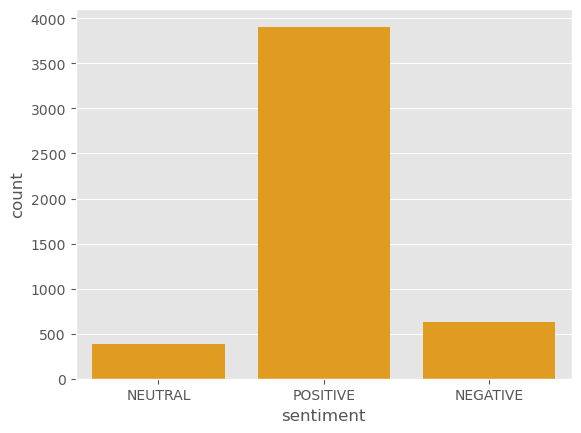

In [16]:
#Plotting Bar chart to represent the count of different sentiments in the data
from matplotlib import style
style.use('ggplot')

sns.countplot(x='sentiment', data = data, color='orange')

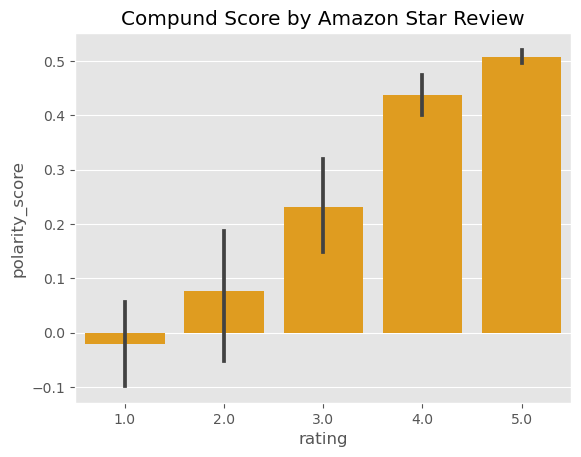

In [17]:
ax1 = sns.barplot(data=data, x='rating', y='polarity_score', color='orange')
ax1.set_title('Compund Score by Amazon Star Review')
plt.show()

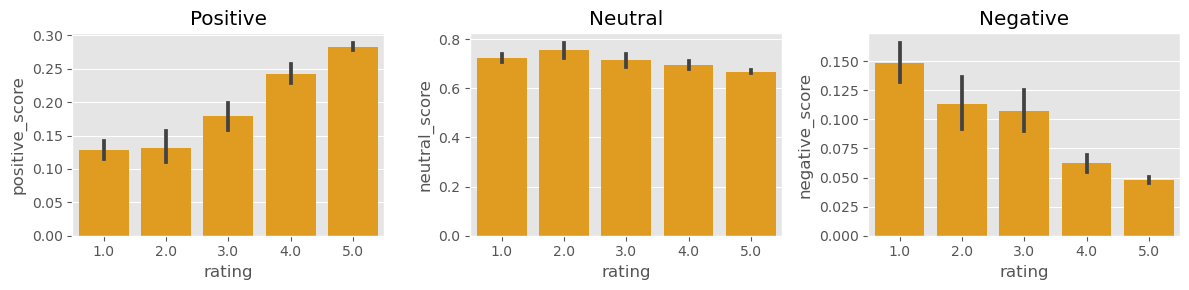

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=data, x='rating', y='positive_score', ax=axs[0], color='orange')
sns.barplot(data=data, x='rating', y='neutral_score', ax=axs[1], color='orange')
sns.barplot(data=data, x='rating', y='negative_score', ax=axs[2], color='orange')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

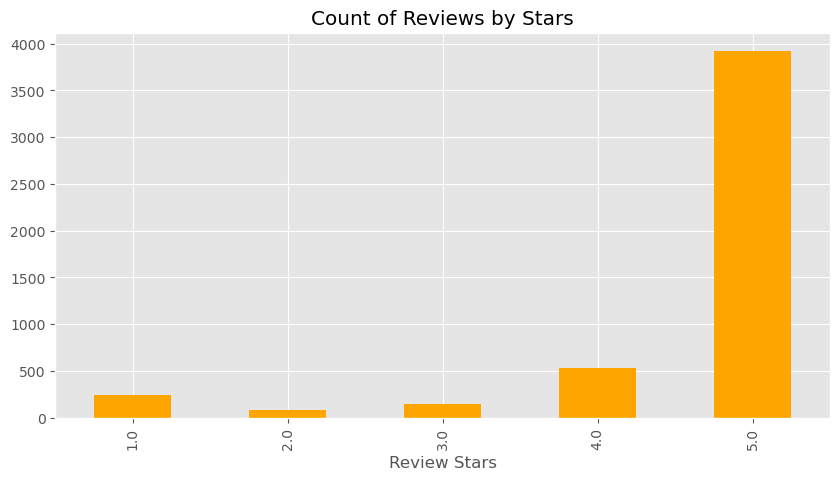

In [19]:
ax2= data['rating'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',color='orange',figsize=(10, 5))
ax2.set_xlabel('Review Stars')
plt.show()

In [20]:
#converting grouped text to lists
positive_review = data[data['sentiment'] == 'POSITIVE']['cleaned_text'].tolist()
neutral_review = data[data['sentiment'] == 'NEUTRAL']['cleaned_text'].tolist()
negative_review = data[data['sentiment'] == 'NEGATIVE']['cleaned_text'].tolist()

In [21]:
#saving tokenized texts to variable
pos_tokens = [token for line in positive_review for token in line.split()]
neg_tokens = [token for line in negative_review for token in line.split()]
neu_tokens = [token for line in neutral_review  for token in line.split()]

In [22]:
#Counting words by sentiment
from collections import Counter

def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [23]:
#Most common words by sentiment
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neu_words = get_tokens(neu_tokens)

In [24]:
#Creatng new dataframe with common words data
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','count'])
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','count'])
neu_df = pd.DataFrame(most_common_neu_words.items(),columns=['words','count'])

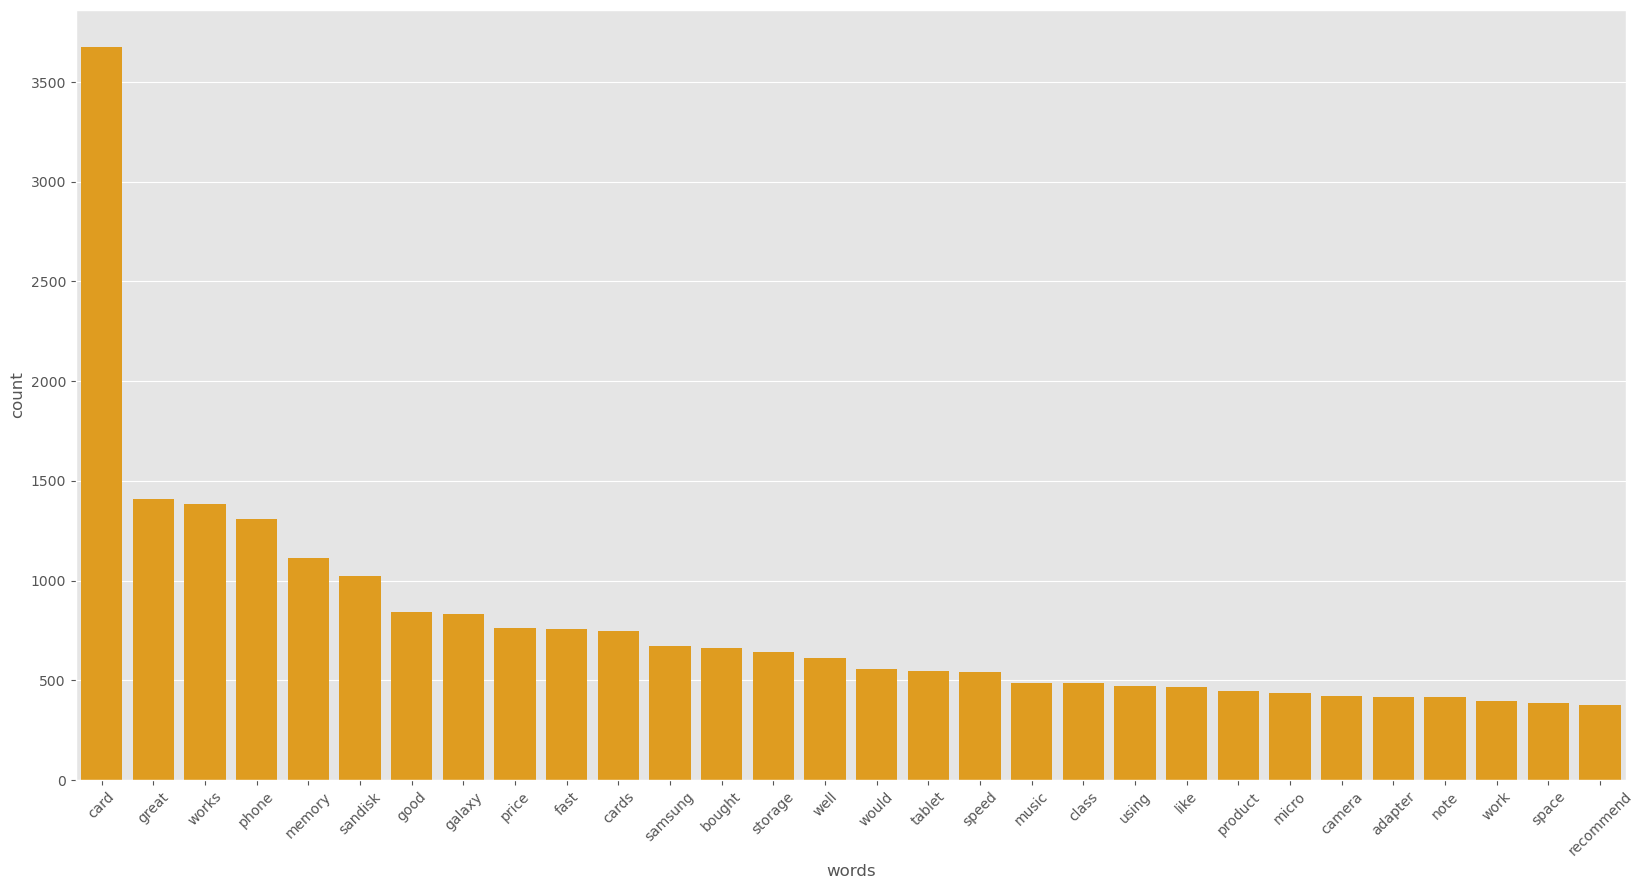

In [25]:
#Plotting Most Common Positive Words
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=pos_df,color='orange')
plt.xticks(rotation=45)
plt.show()

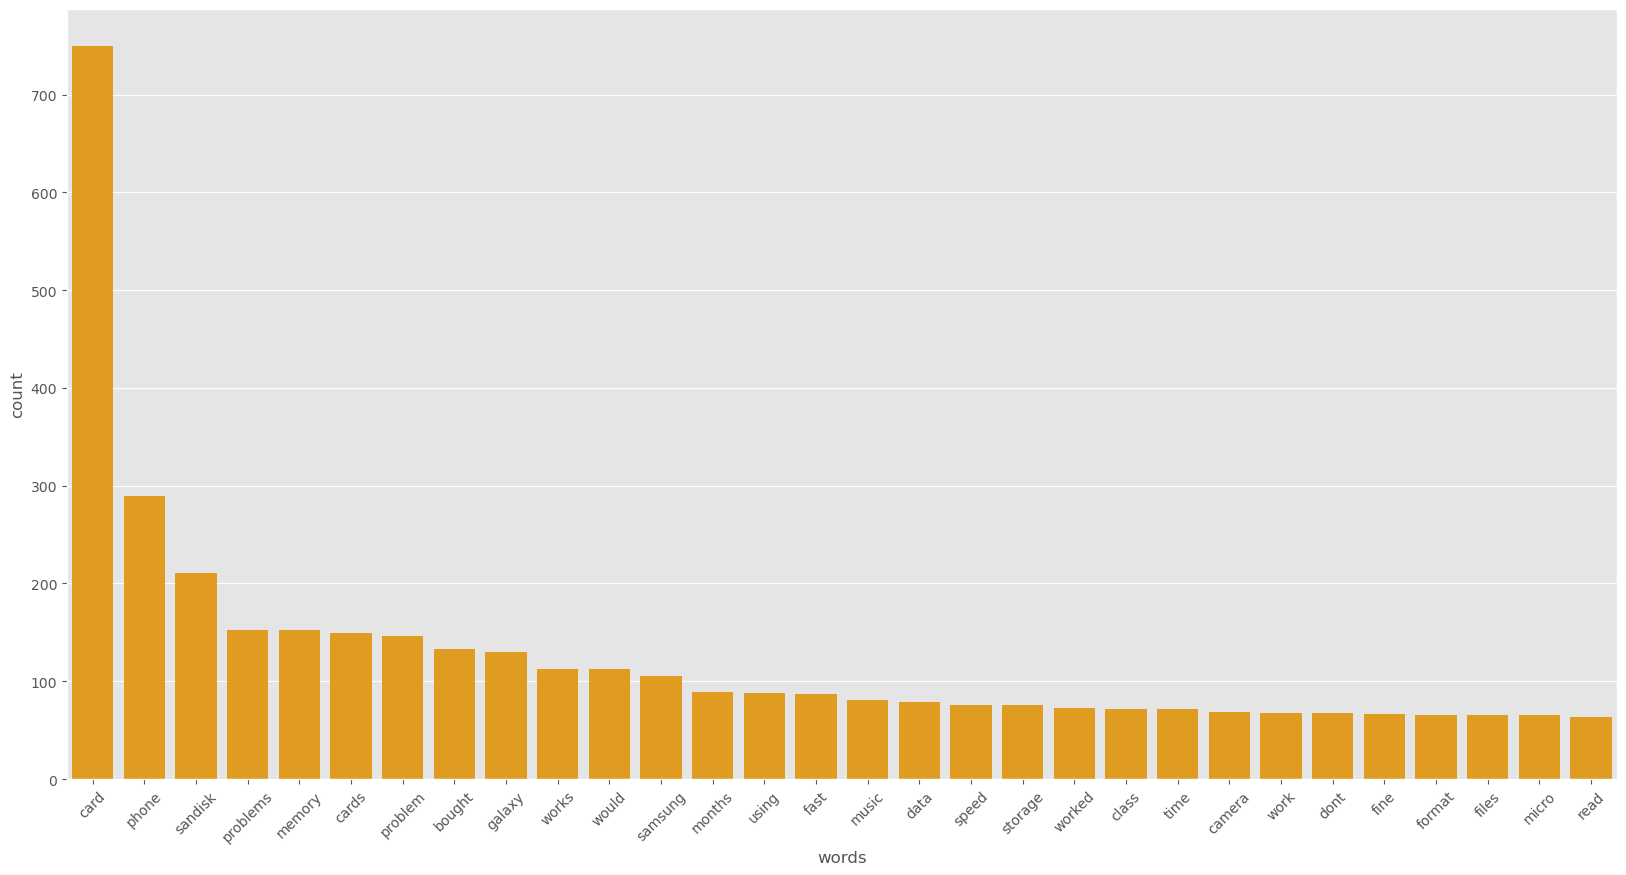

In [26]:
#Plotting Most Common Negative Words
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=neg_df,color='orange')
plt.xticks(rotation=45)
plt.show()

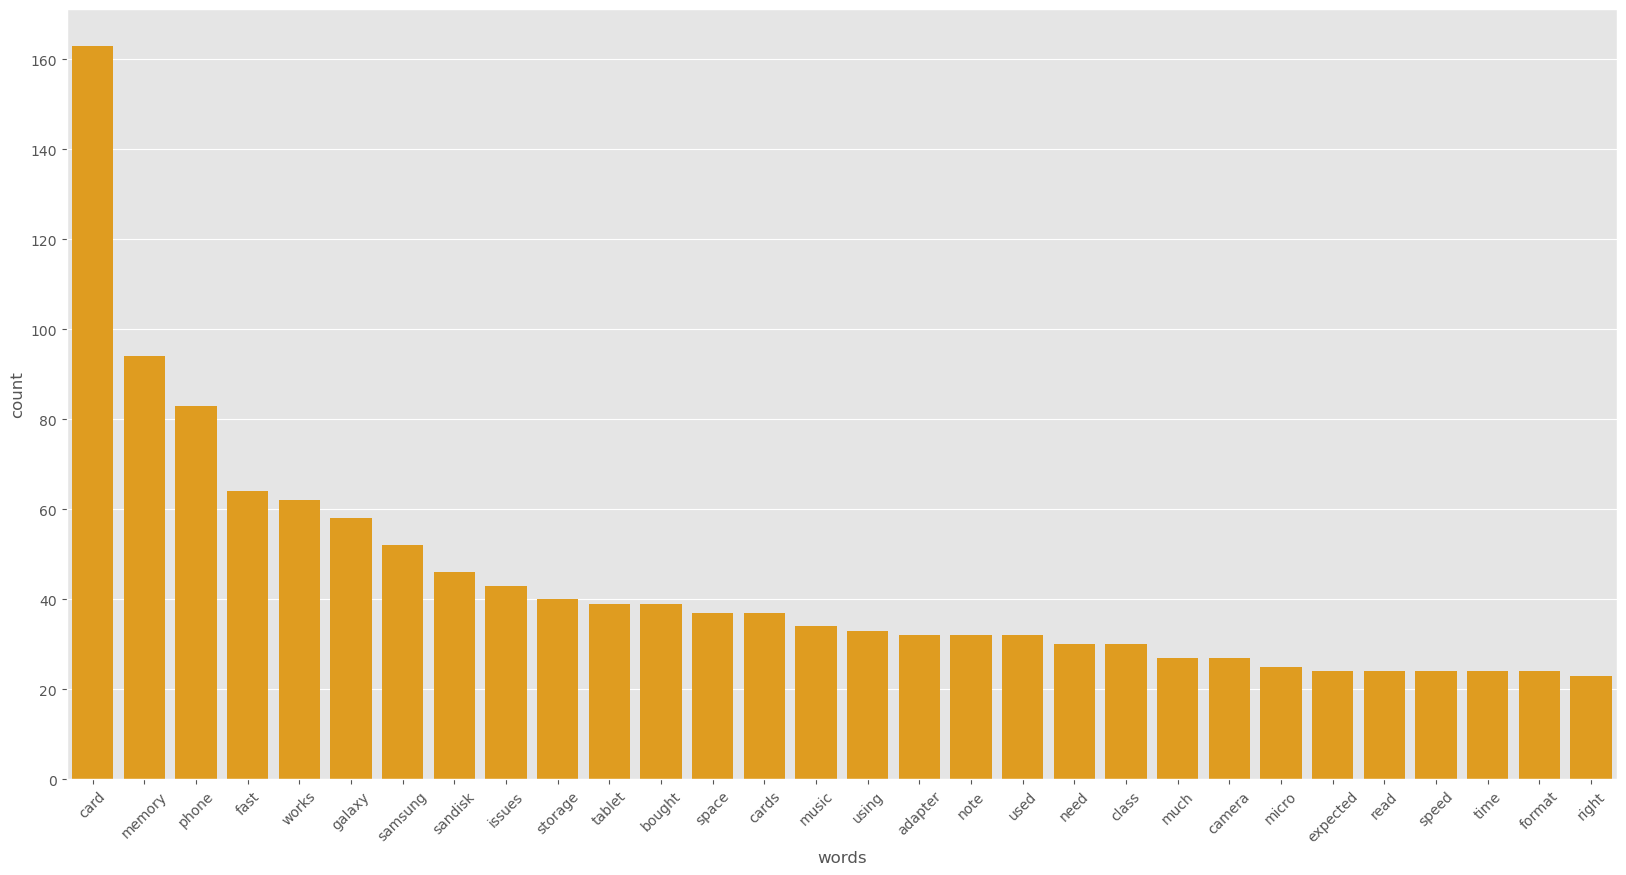

In [27]:
#Plotting Most Common Neutral Words
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='count',data=neu_df, color='orange')
plt.xticks(rotation=45)
plt.show()
